# Insurance Claims- Fraud Detection

### 1. Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# 2.Checking basic details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
for i in df.columns:
  print(df[i].value_counts())
  print("________________________________________")

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
________________________________________
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
________________________________________
296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804    1
426708    1
963285    1
789208    1
116735    1
Name: policy_number, Length: 1000, dtype: int64
________________________________________
28-04-1992    3
05-08-1992    3
01-01-2006    3
14-12-1991    2
15-05-1997    2
             ..
14-01-1999  

#### Droping unwanted columns

In [8]:
df.drop(['_c39','policy_bind_date','incident_date','incident_location','insured_education_level','insured_occupation','insured_hobbies'],axis=1,inplace=True)

In [9]:
df.shape

(1000, 33)

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

## 3.EDA

In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

Categorical variables:


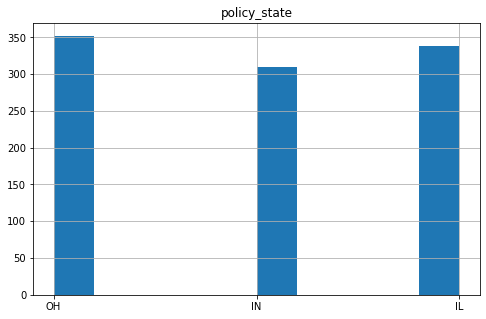

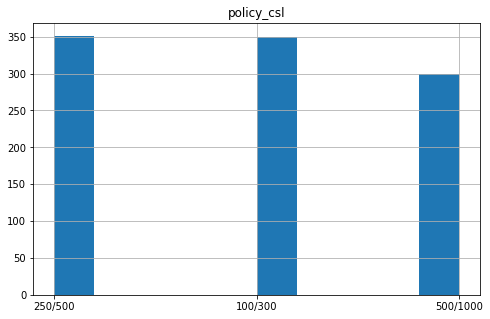

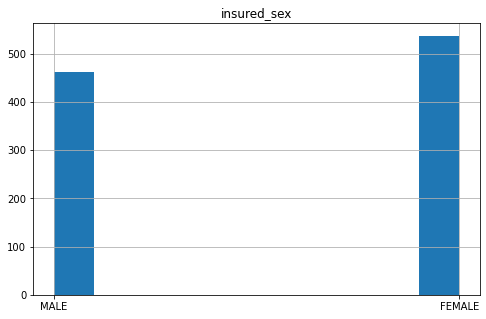

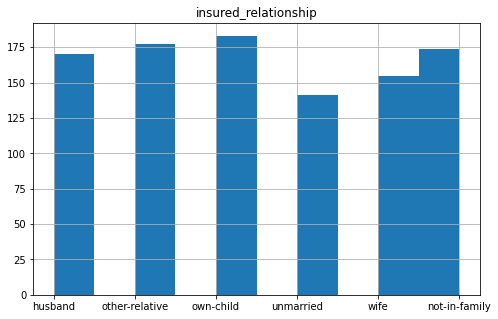

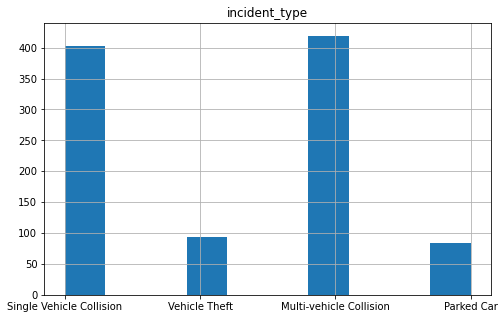

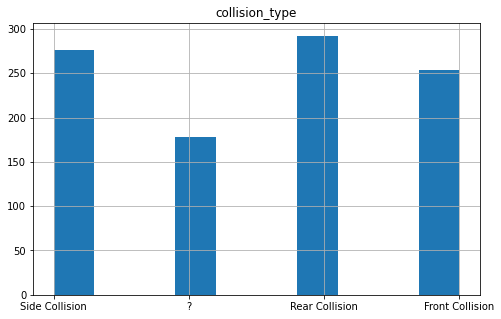

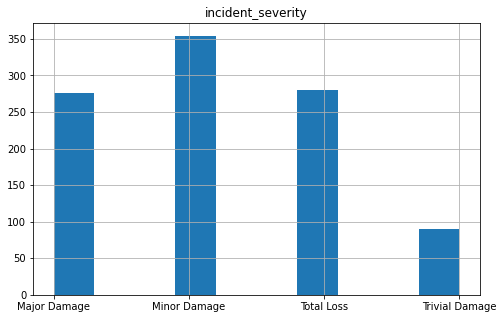

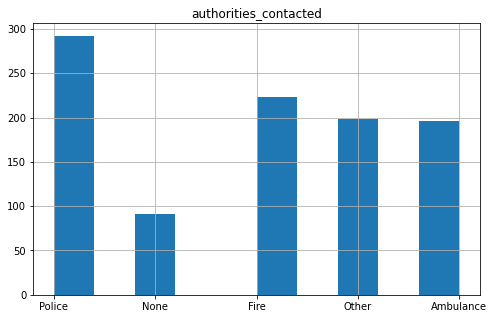

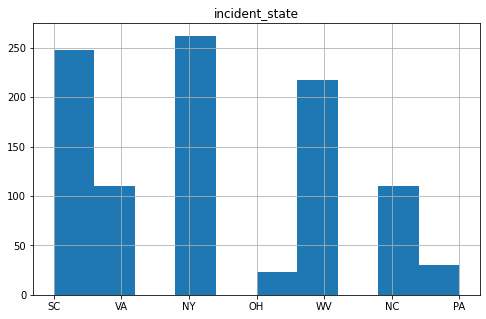

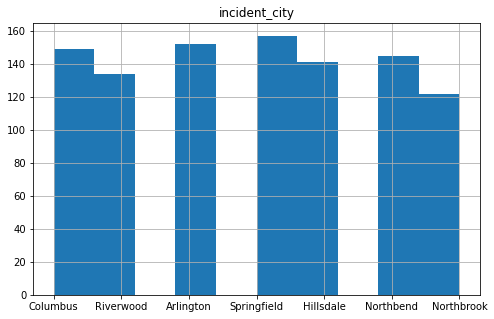

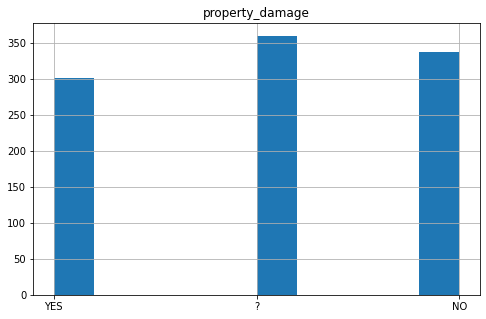

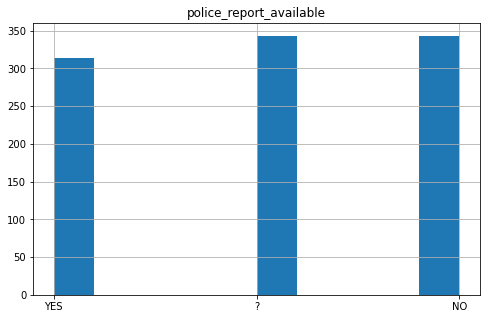

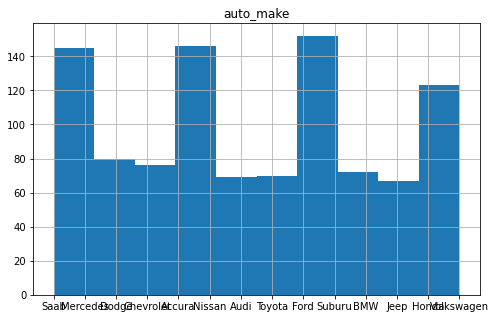

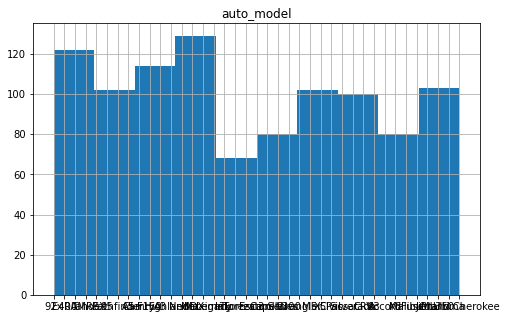

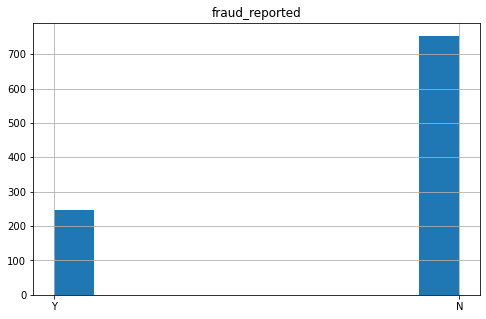

In [12]:
print("Categorical variables:")
cate_cols=['policy_state','policy_csl','insured_sex', 'insured_relationship','incident_type', 'collision_type',
           'incident_severity', 'authorities_contacted', 'incident_state','incident_city','property_damage',
           'police_report_available','auto_make','auto_model','fraud_reported']
for i in cate_cols:
    plt.figure(figsize = (8, 5))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()


Continuous variables:


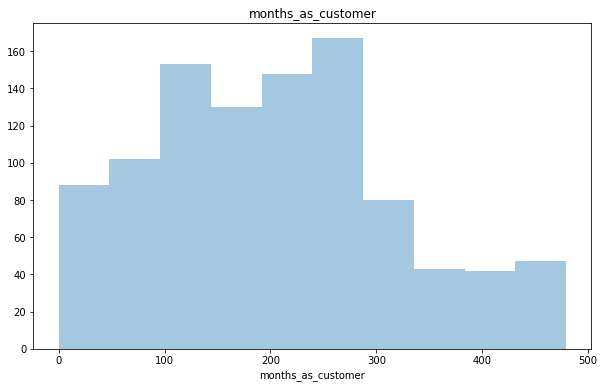

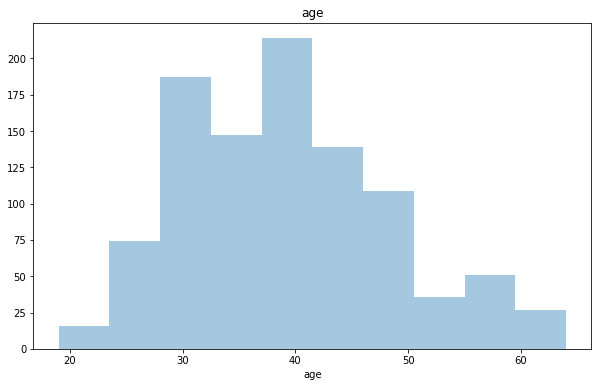

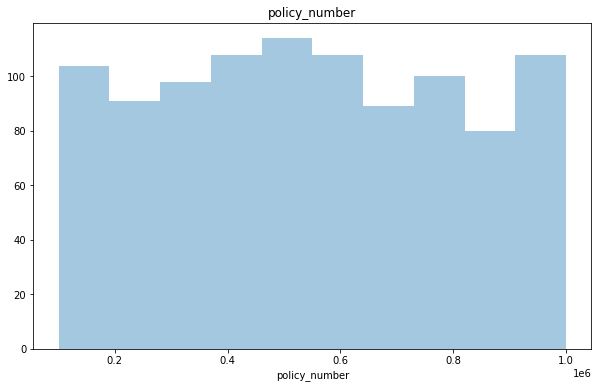

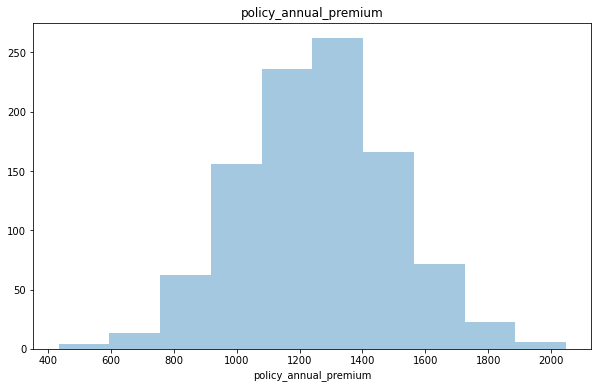

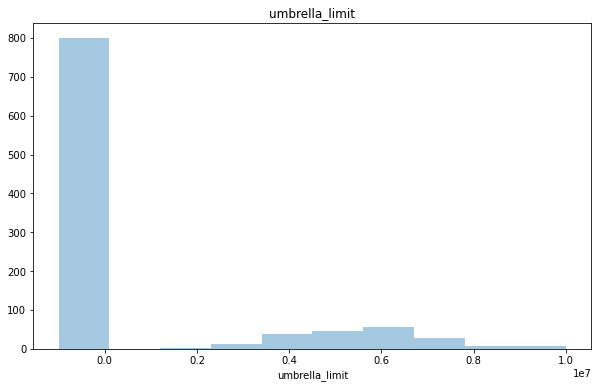

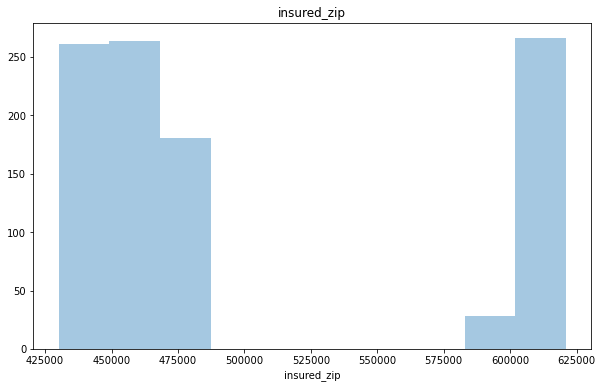

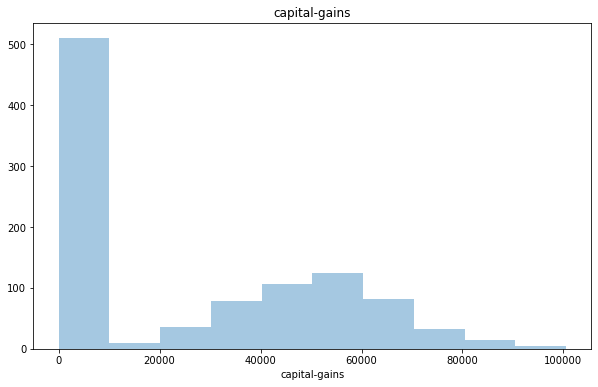

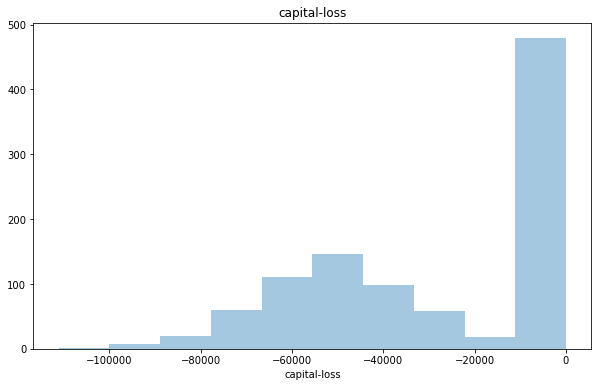

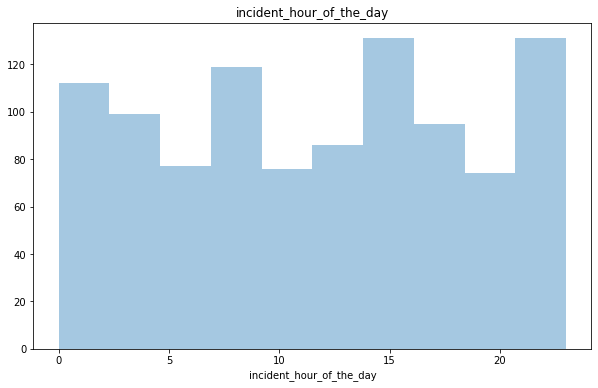

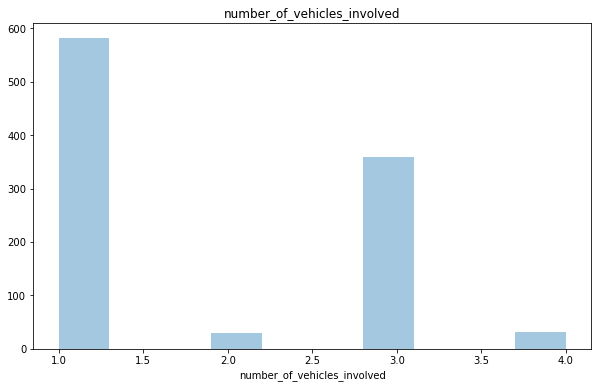

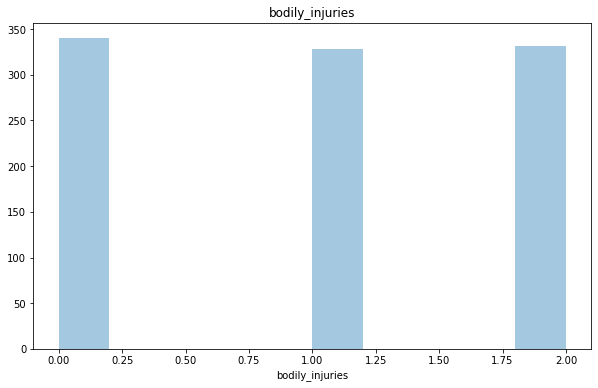

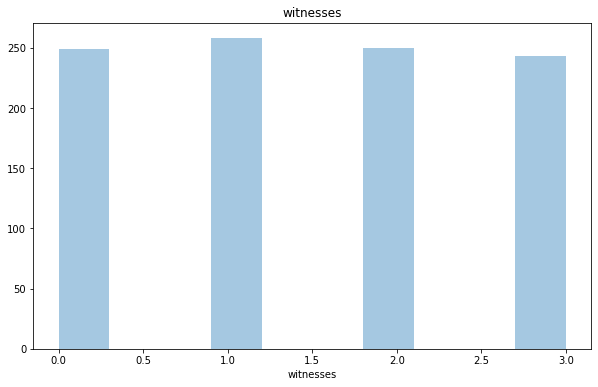

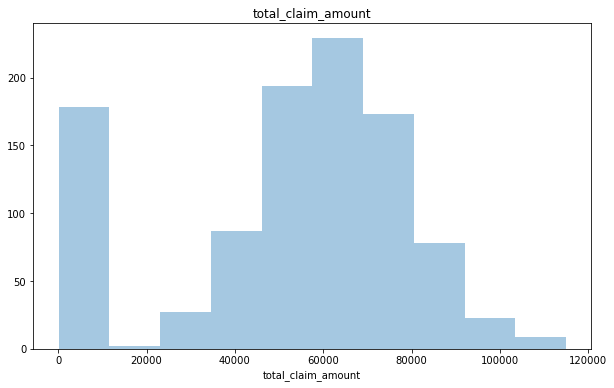

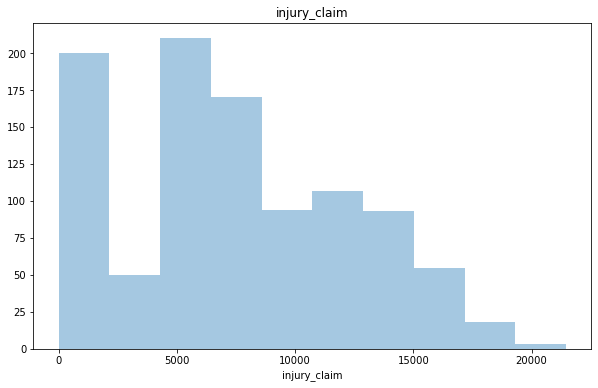

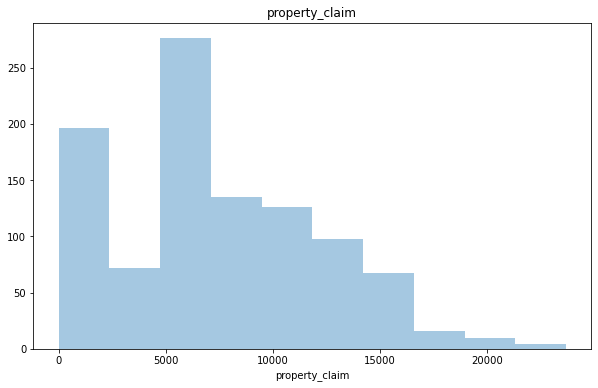

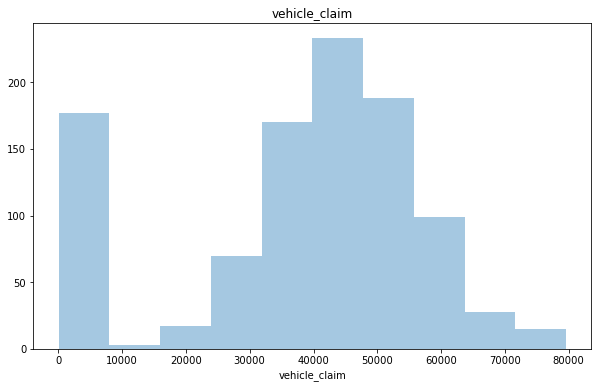

In [13]:
print("Continuous variables:")

cont_cols=['months_as_customer', 'age', 'policy_number','policy_annual_premium','umbrella_limit', 'insured_zip','capital-gains', 'capital-loss','incident_hour_of_the_day',
       'number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim',
           'property_claim', 'vehicle_claim']

for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (10, 6))
    sns.distplot(df[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

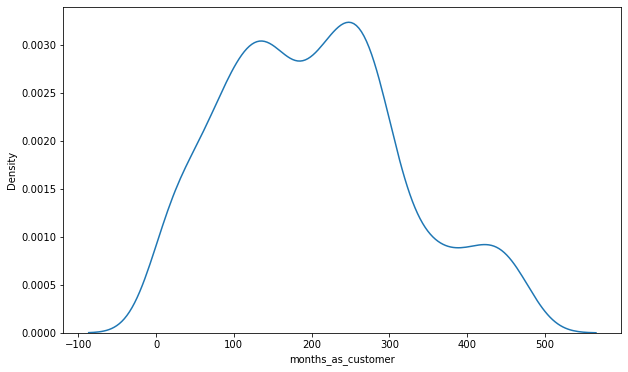

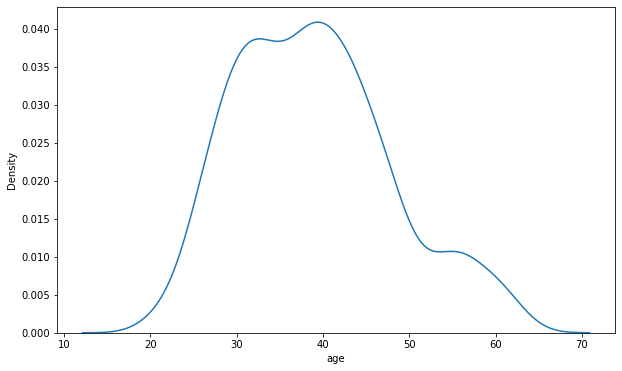

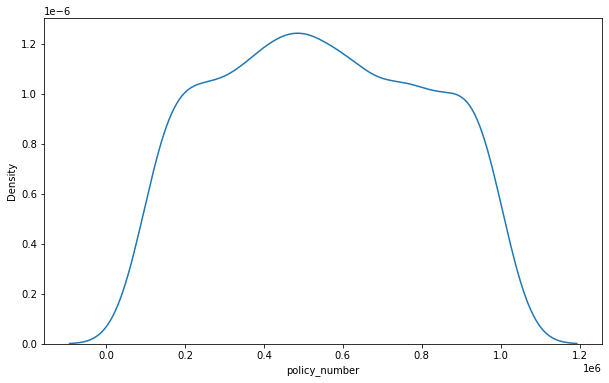

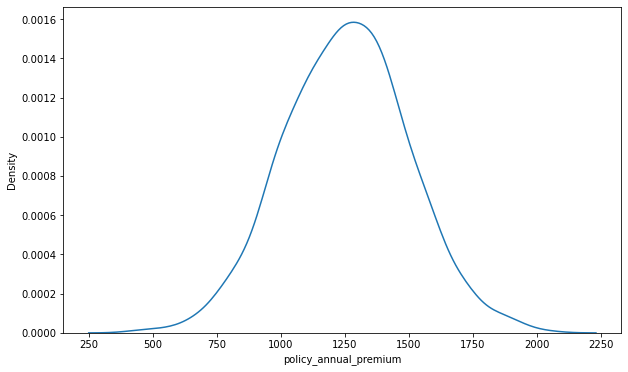

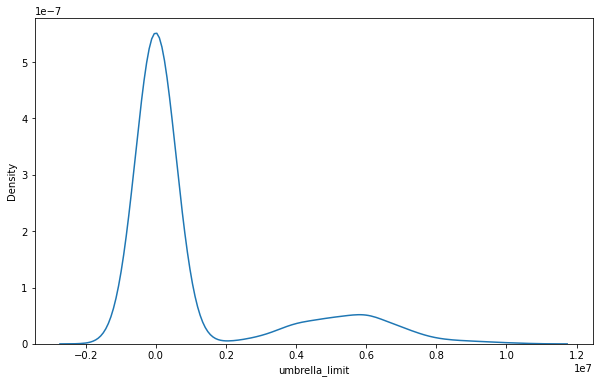

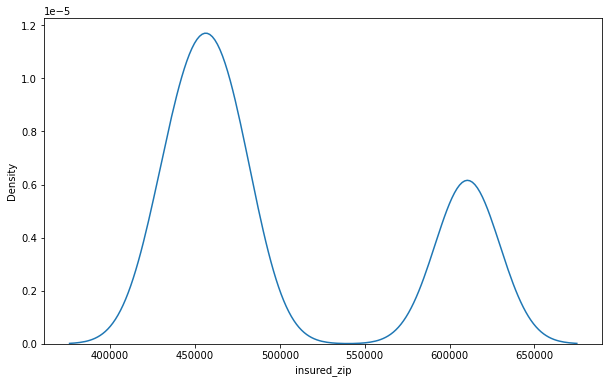

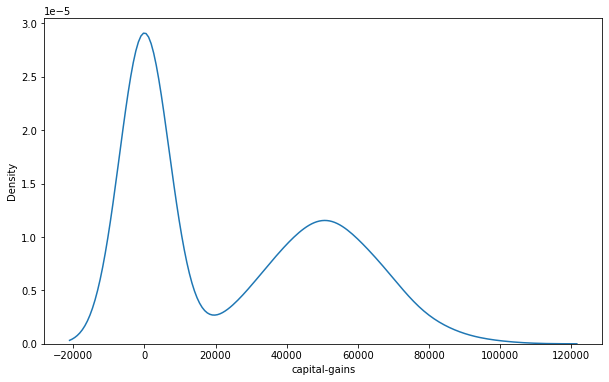

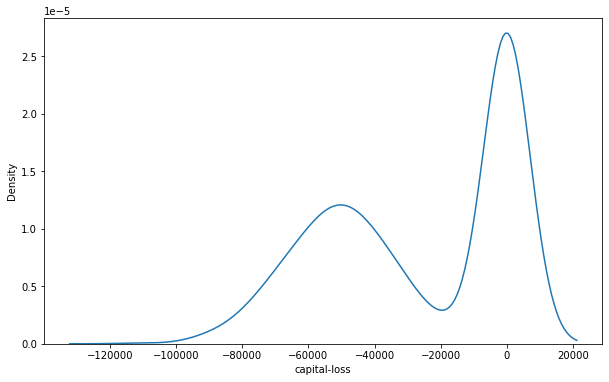

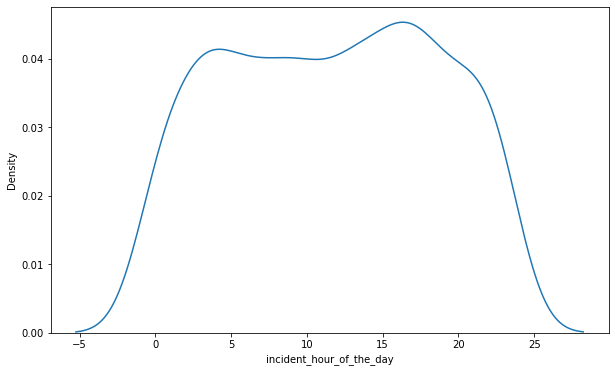

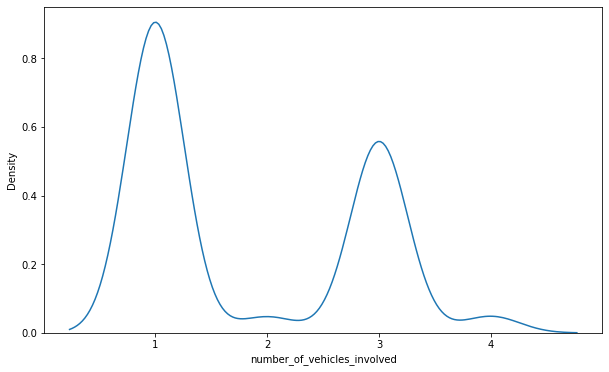

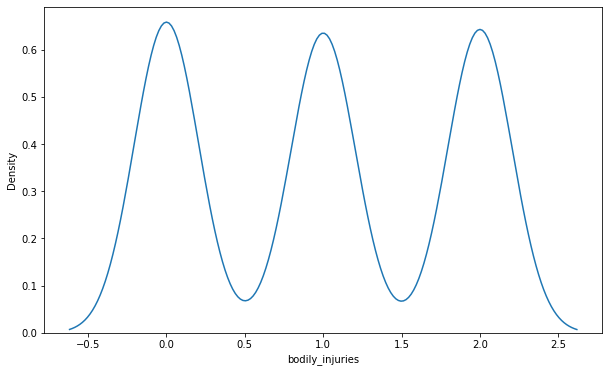

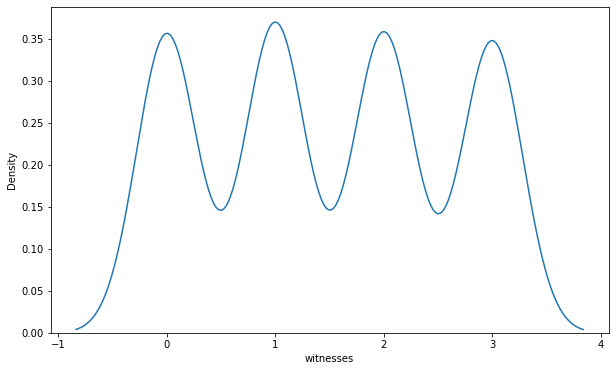

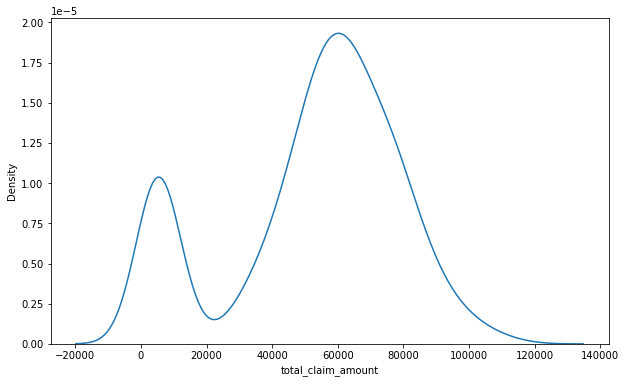

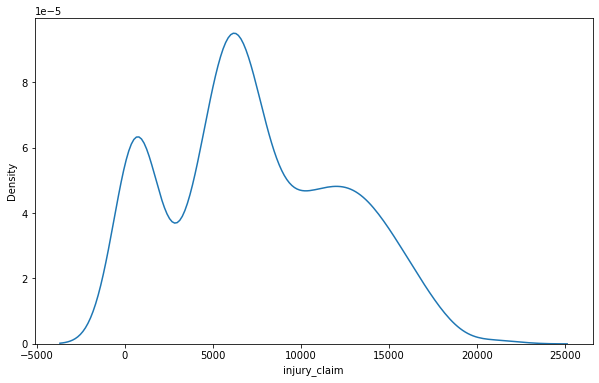

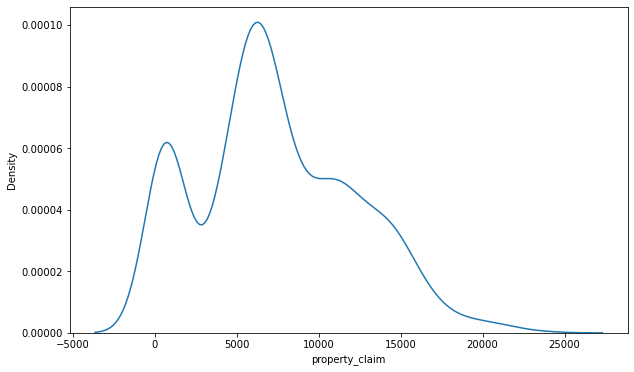

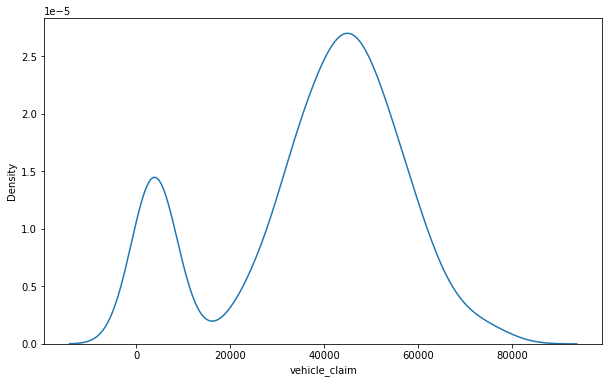

In [14]:
for i in df[cont_cols]:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[cont_cols][i])


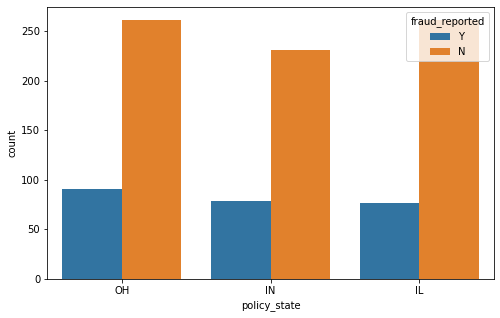

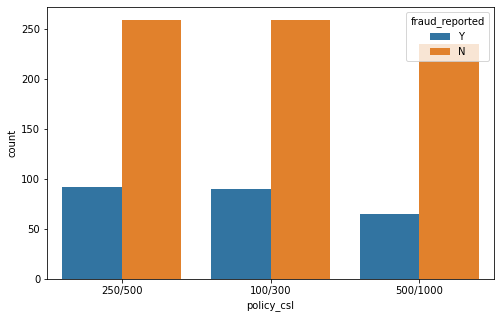

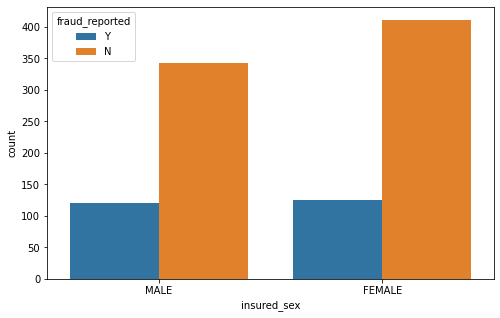

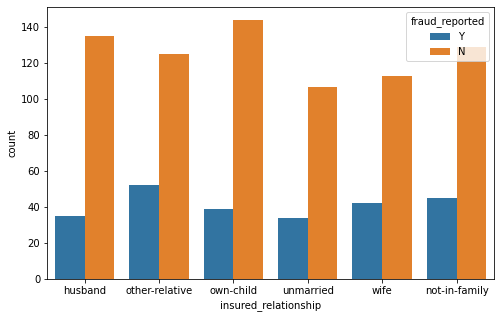

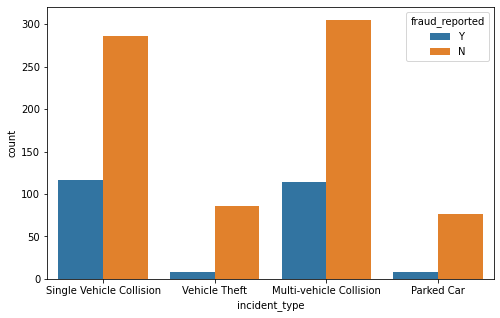

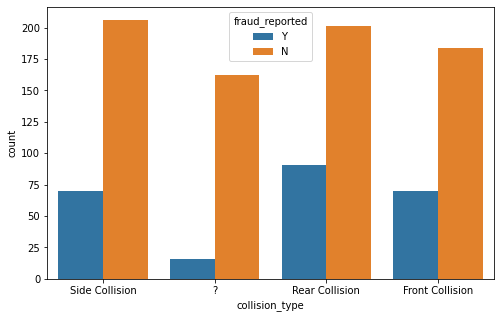

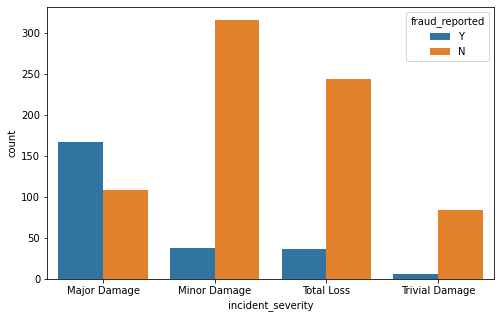

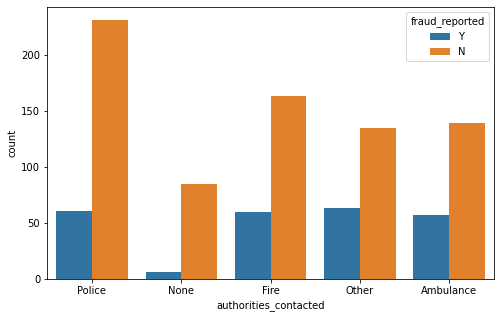

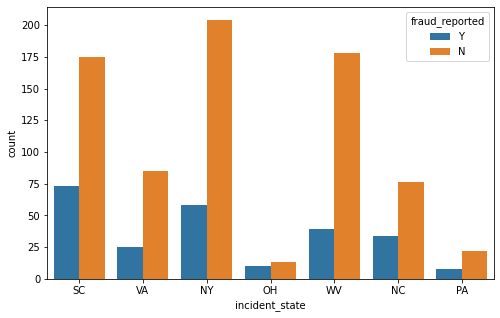

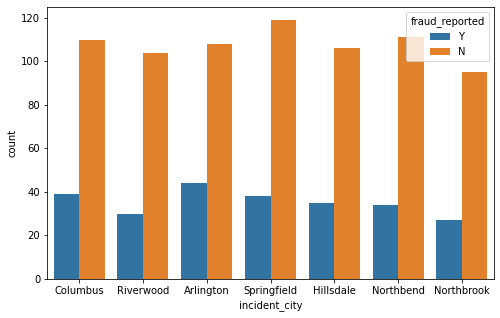

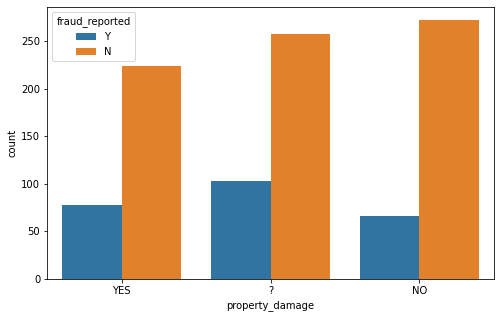

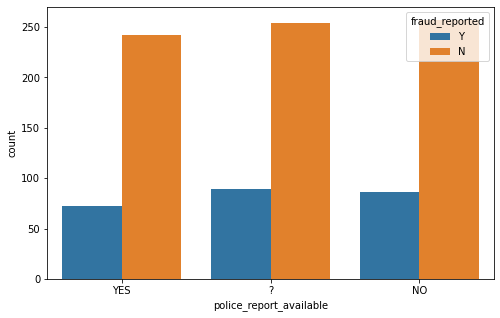

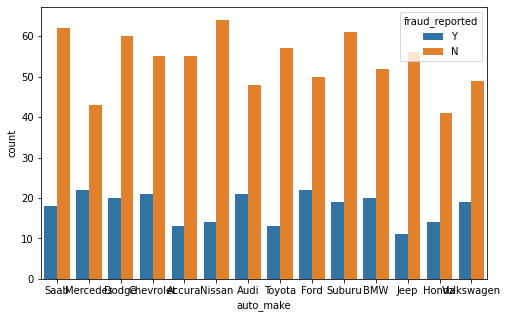

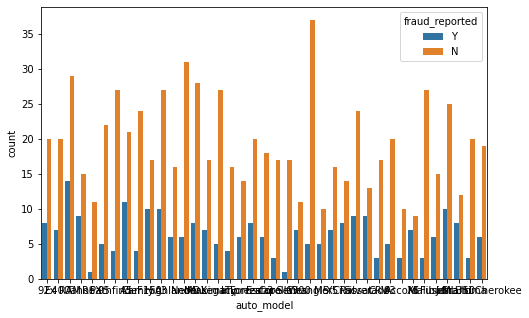

In [15]:
for i in cate_cols[:-1]:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i],hue=df['fraud_reported'])

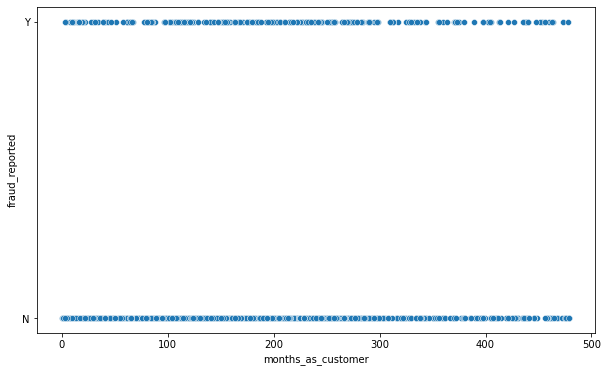

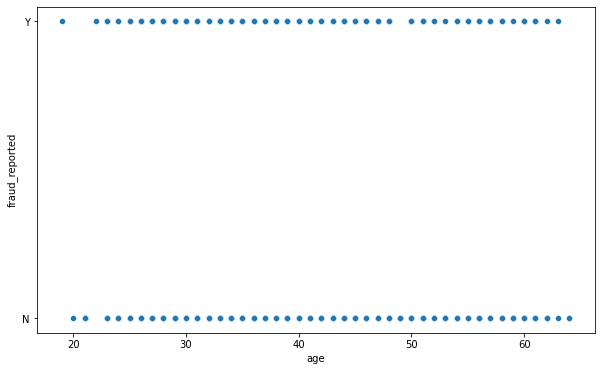

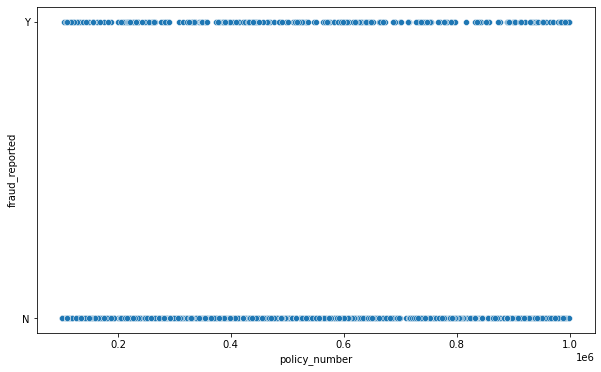

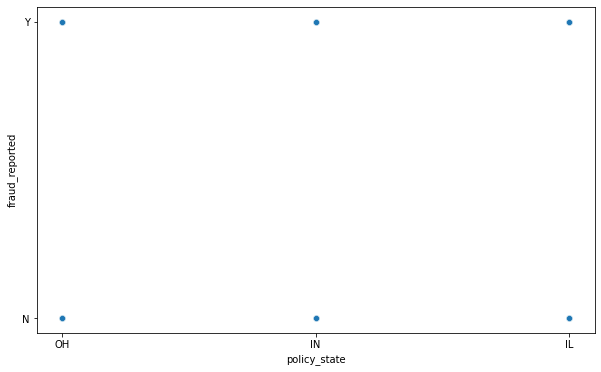

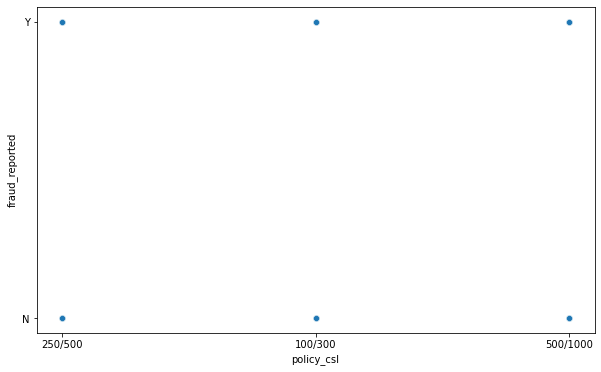

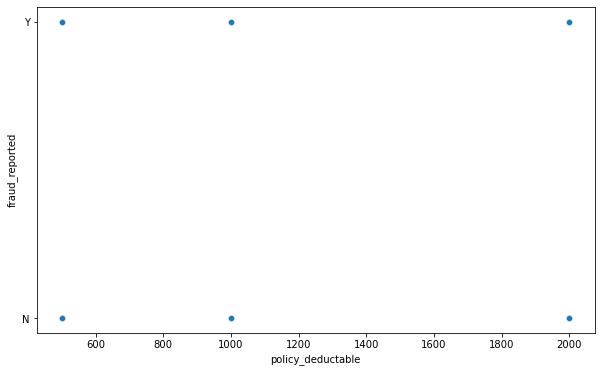

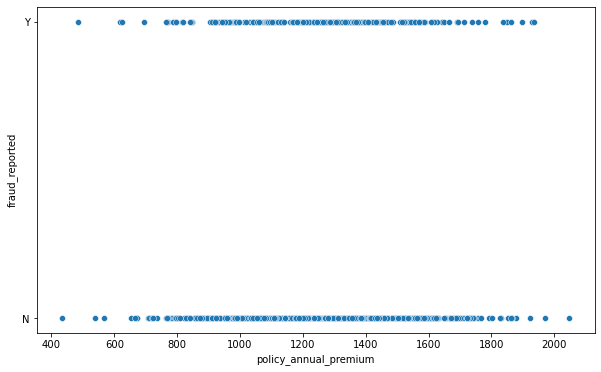

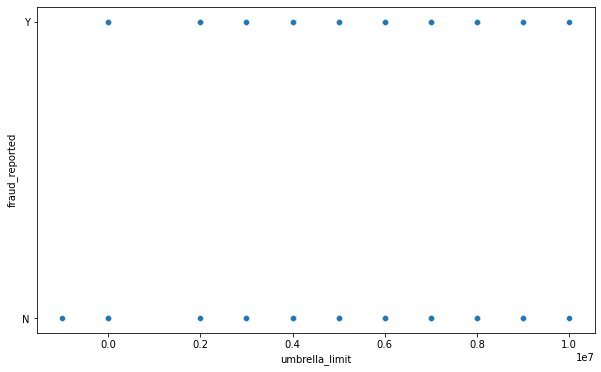

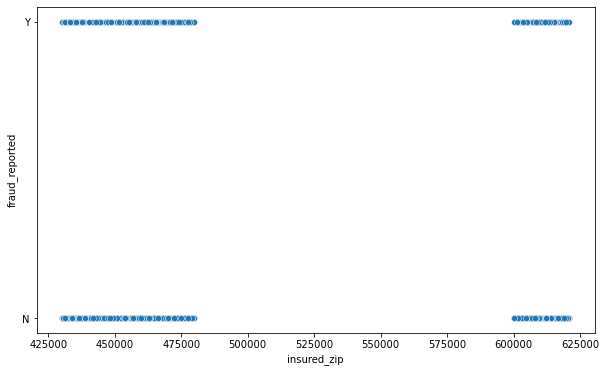

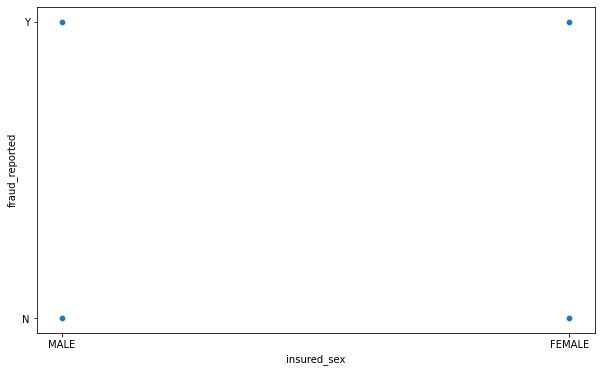

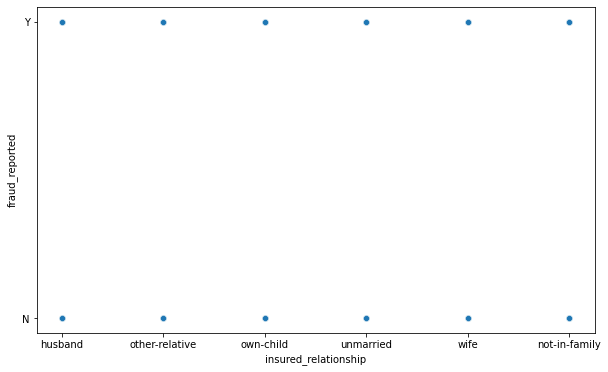

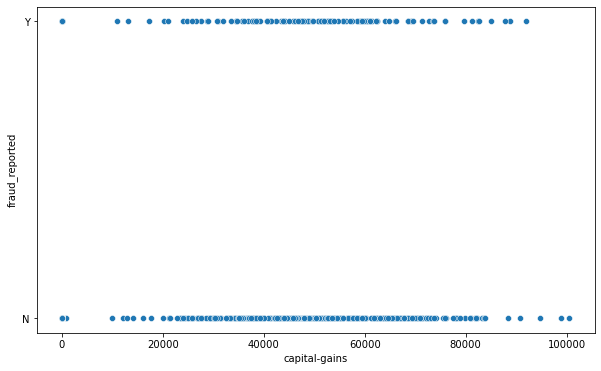

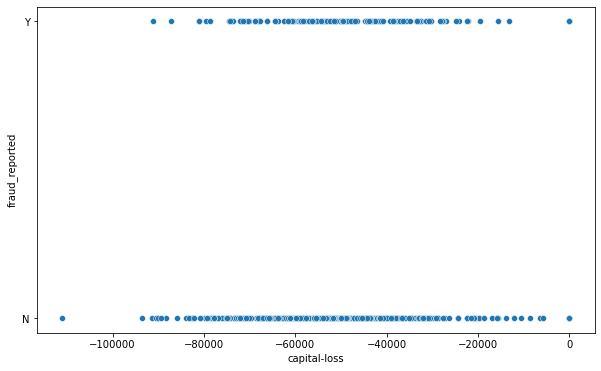

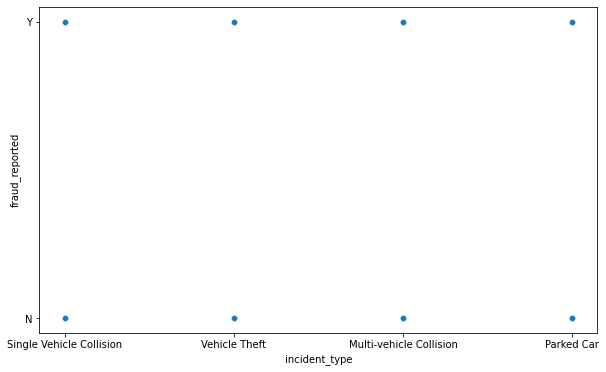

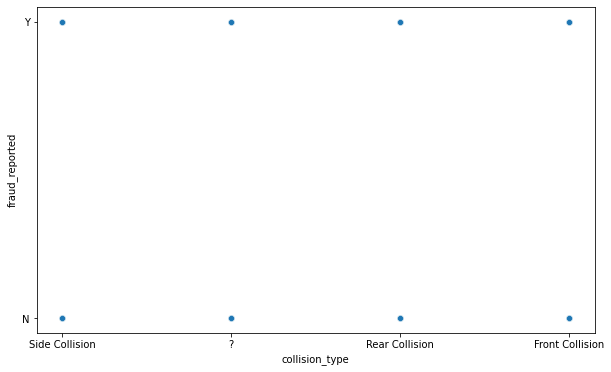

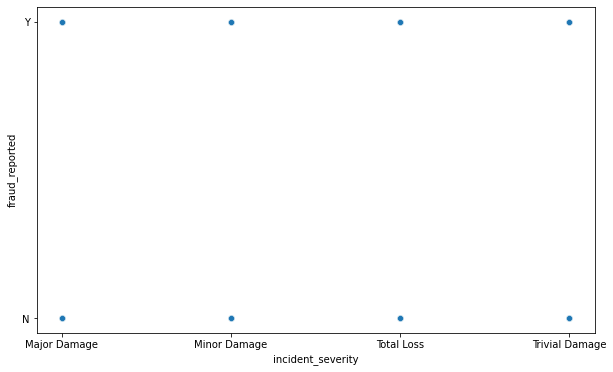

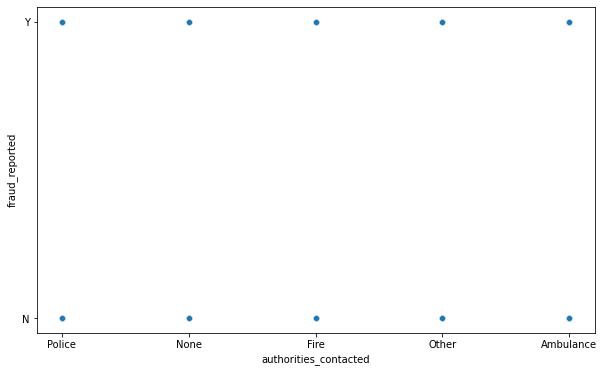

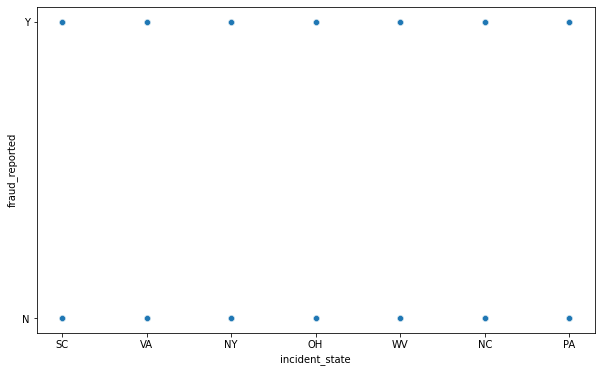

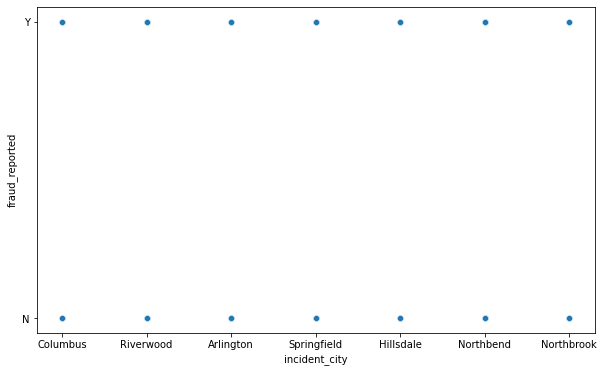

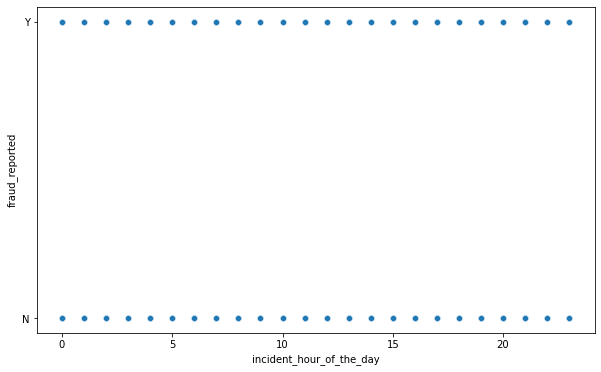

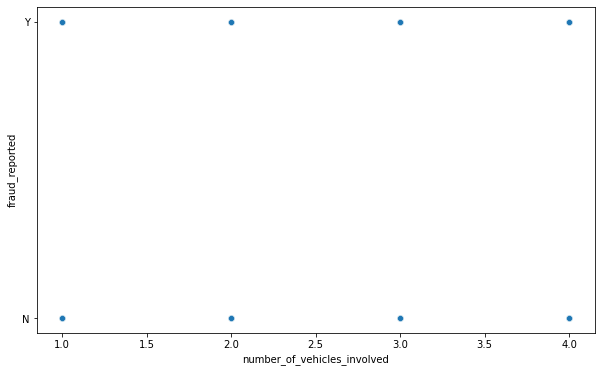

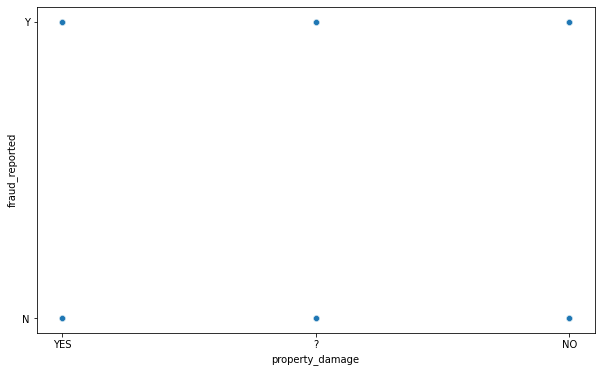

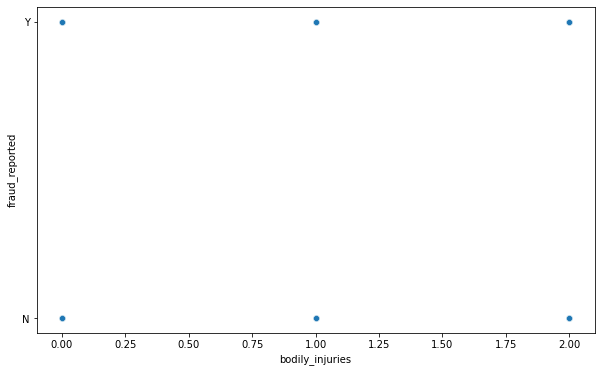

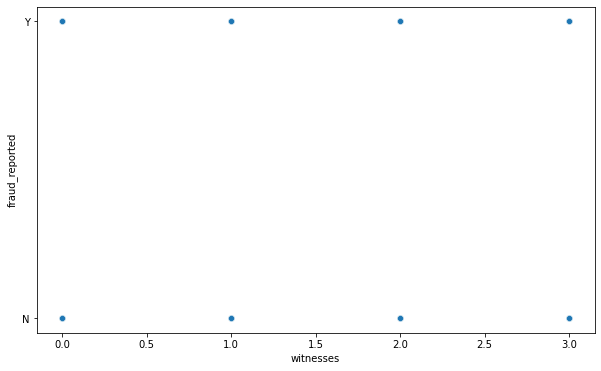

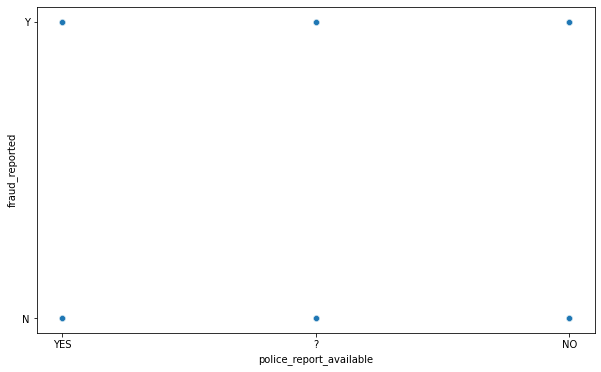

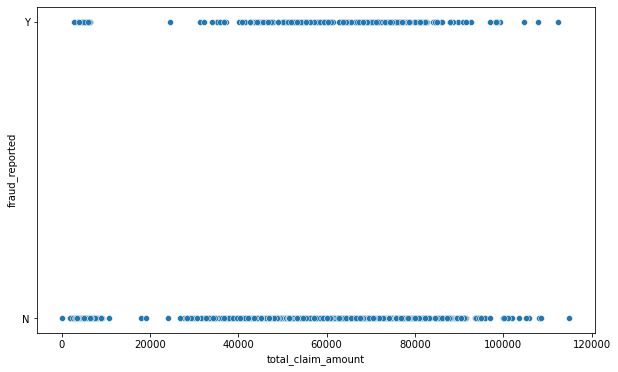

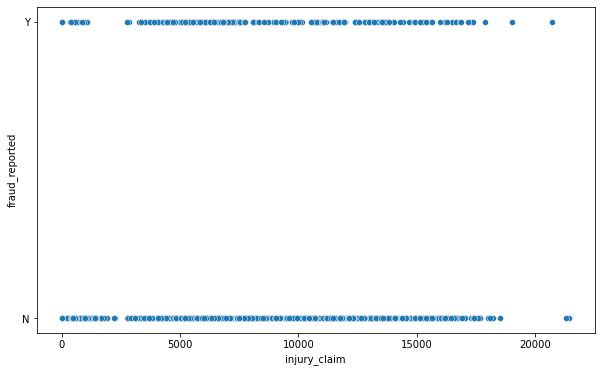

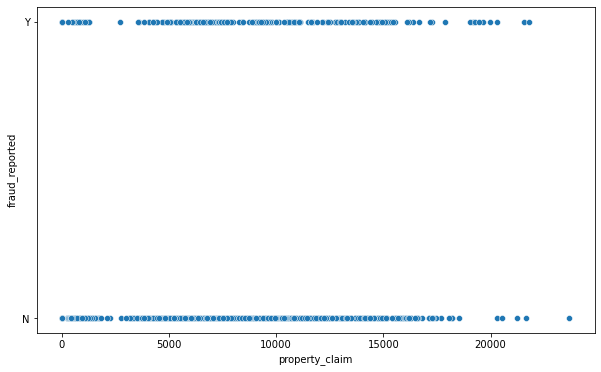

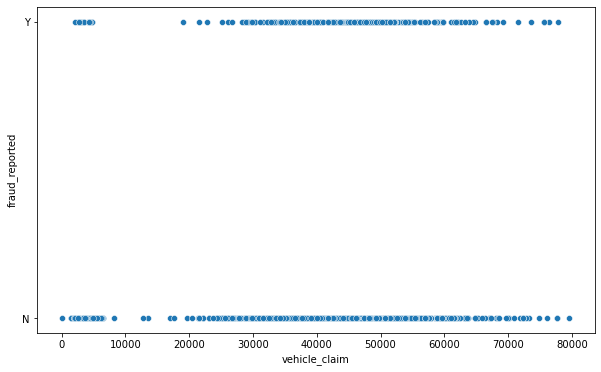

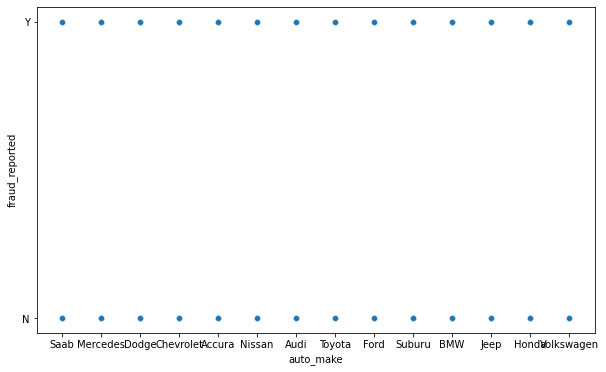

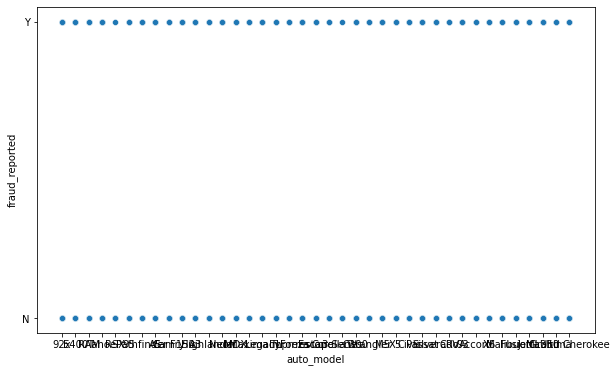

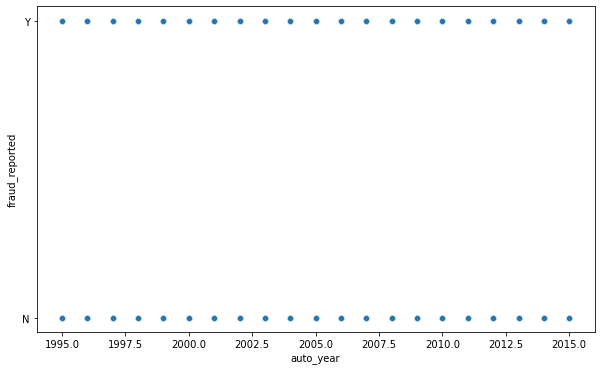

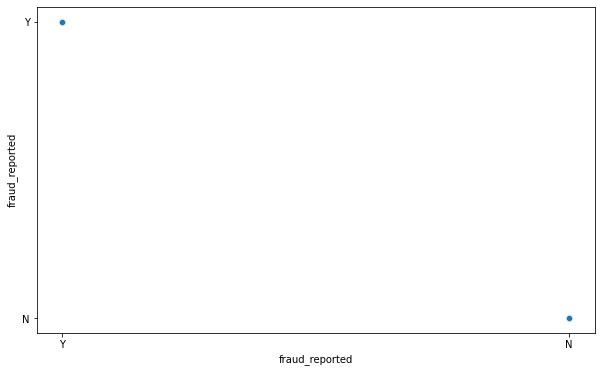

In [16]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.scatterplot(x=i,y=df['fraud_reported'],data=df)

In [17]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

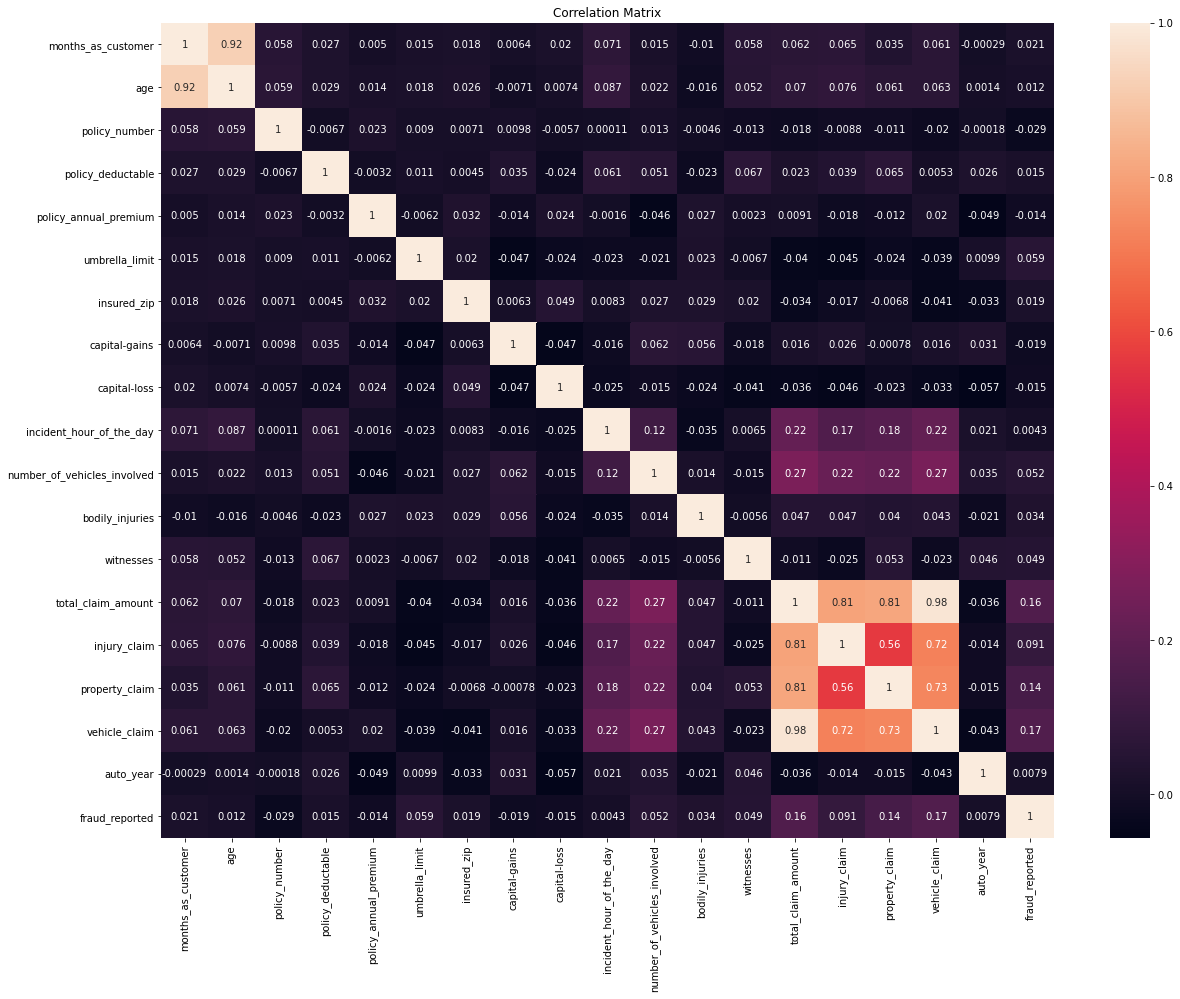

In [18]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

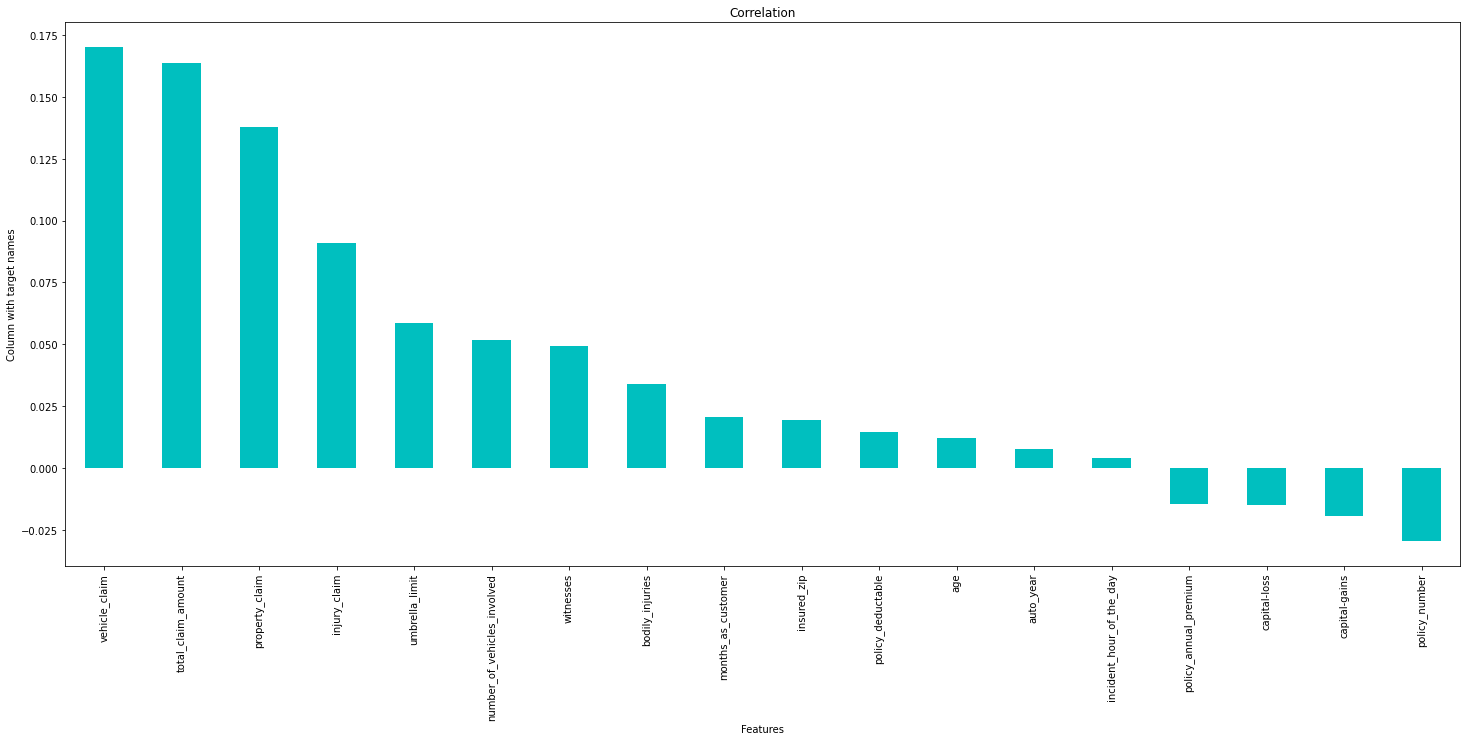

In [19]:
plt.figure(figsize = (25, 10))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

## 4. Data pre-processing
Replacing missing values with mode value.

In [20]:
df['collision_type'].replace(['?'],df['collision_type'].mode(),inplace=True)
df['property_damage'].replace(['?'],df['property_damage'].mode(),inplace=True)

In [21]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [22]:
df['police_report_available'].replace(['?'],'NO',inplace=True)

In [23]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [24]:
df.drop(['policy_csl'],axis=1,inplace=True)

In [25]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_relationship,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,husband,...,71610,6510,13020,52080,Saab,92x,2004,1,250,500
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,other-relative,...,5070,780,780,3510,Mercedes,E400,2007,1,250,500
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,own-child,...,34650,7700,3850,23100,Dodge,RAM,2007,0,100,300
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,unmarried,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,unmarried,...,6500,1300,650,4550,Accura,RSX,2009,0,500,1000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [27]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
csl_per_person                 0.410015
csl_per_accident               0.605587
dtype: float64

#### One hot encoding

In [28]:
df=x= pd.get_dummies(df, prefix_sep="_")

In [29]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,0,0,0,0,1,0,0,0,1
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,0,0,0,0,0,1,0,0,0,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,0,0,0,0,1,0,0,0,1,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,0,0,0,0,1,0,0,0,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,0,0,0,0,0,0,1,1,0,0


In [30]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,0.023000,0.04200,0.023000,0.016000,0.349000,0.351000,0.300000,0.300000,0.349000,0.351000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,0.149978,0.20069,0.149978,0.125538,0.476892,0.477522,0.458487,0.458487,0.476892,0.477522
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Removing outliers

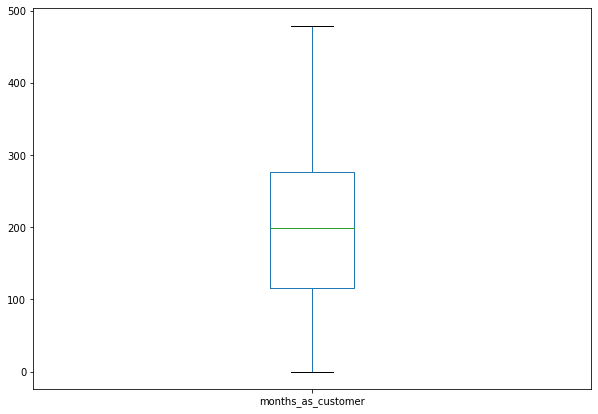

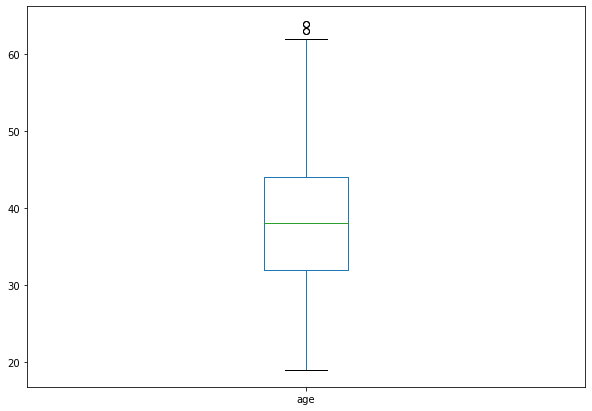

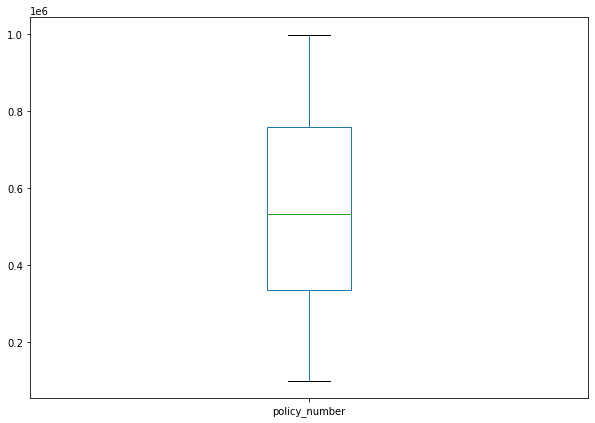

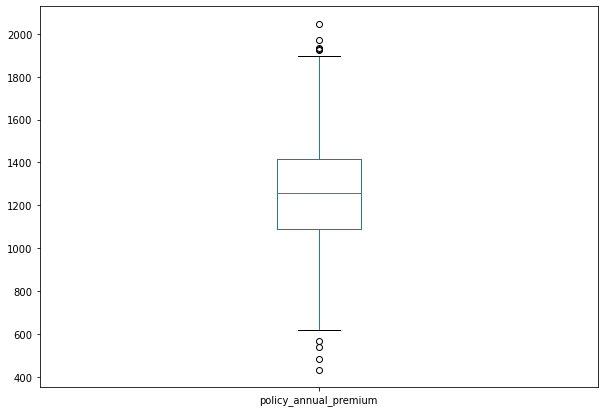

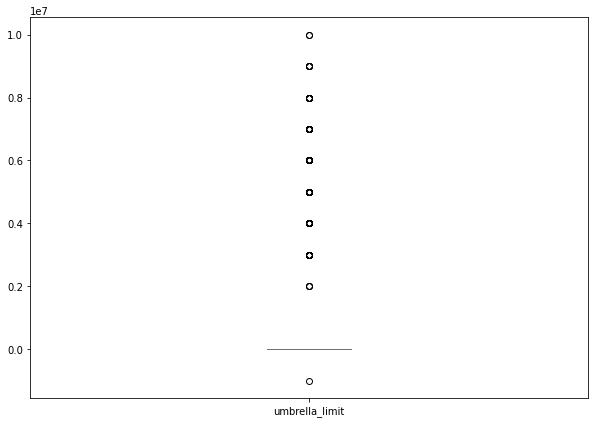

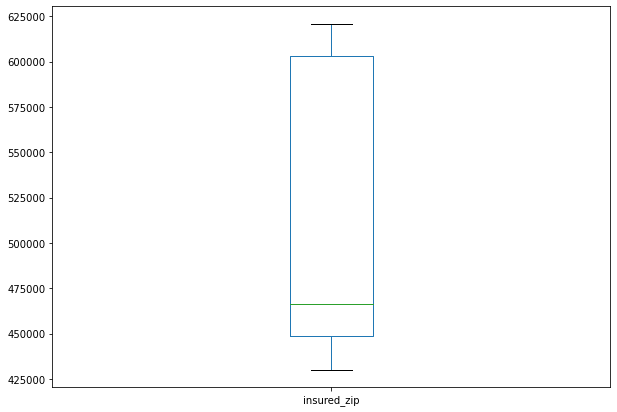

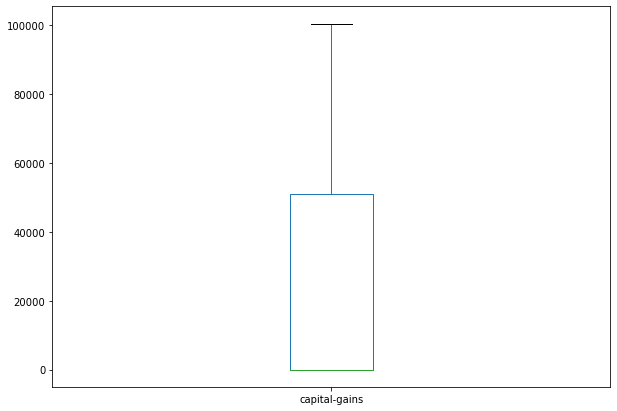

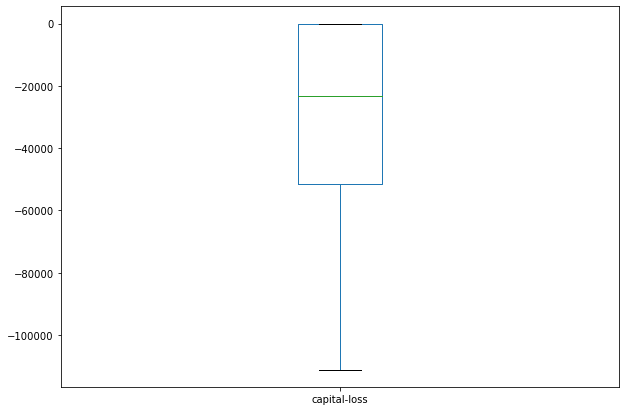

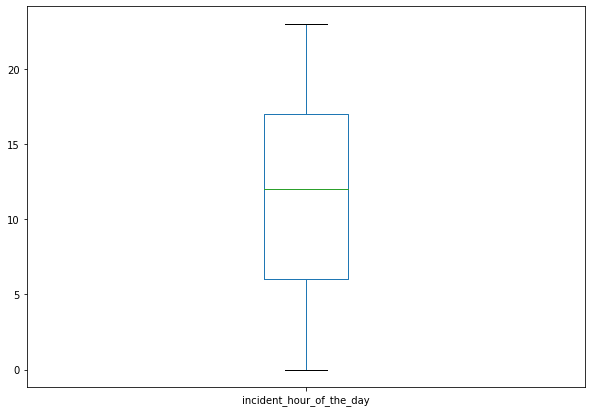

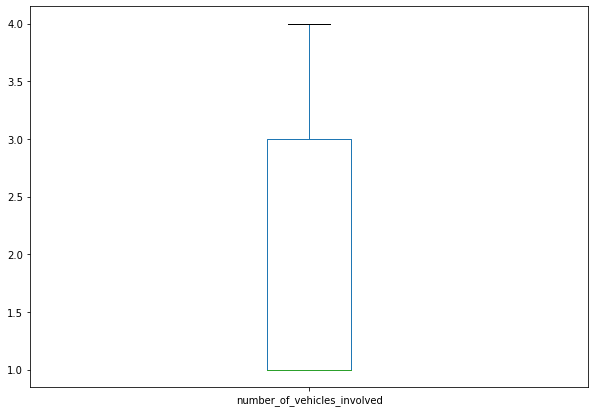

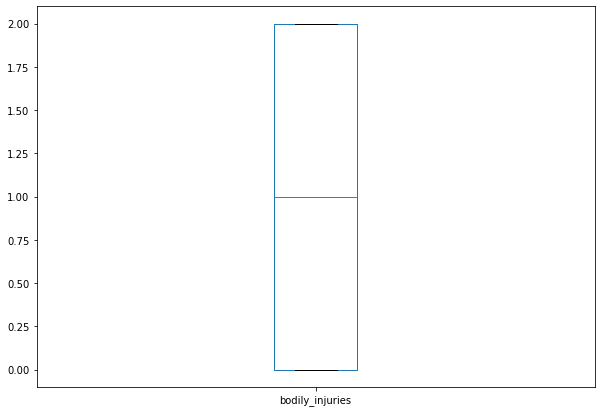

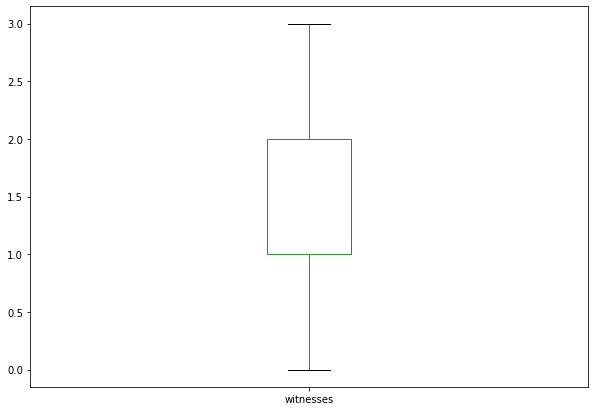

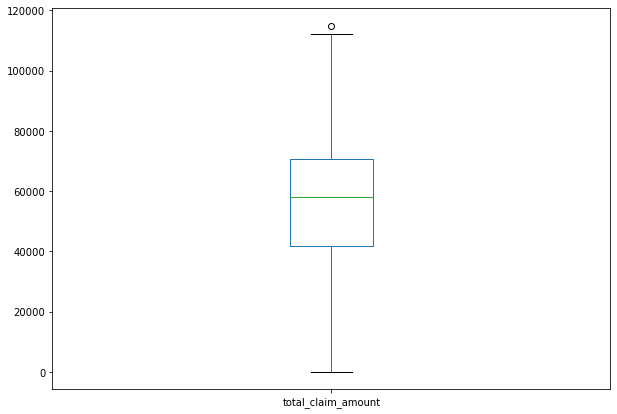

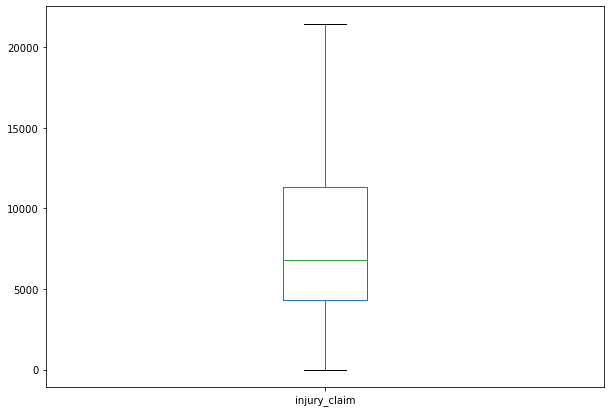

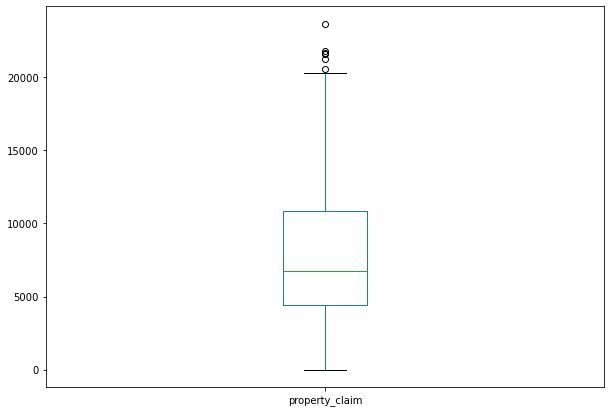

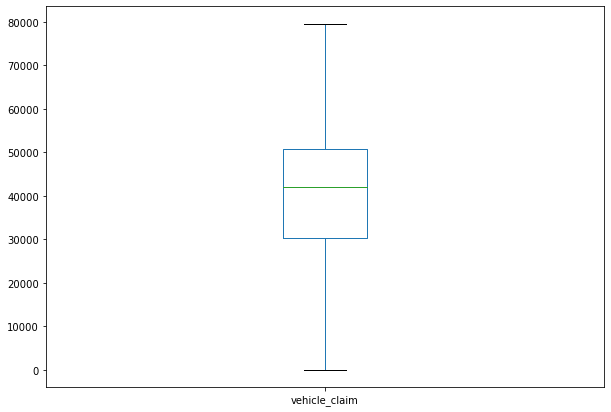

In [31]:
for i in cont_cols:
    plt.figure(figsize = (10, 7))
    df[i].plot.box()

There is no outliers present in the data.still checking if any using Z score method.

In [32]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (1000, 124)
[[1.07813958 0.99083647 0.09595307 ... 0.65465367 0.73218735 1.35978044]
 [0.2089946  0.33407345 0.79152739 ... 0.65465367 0.73218735 1.35978044]
 [0.60800168 1.08891308 0.55056594 ... 0.65465367 1.36577067 0.73541284]
 ...
 [0.64276748 0.54161057 1.44891961 ... 0.65465367 0.73218735 1.35978044]
 [2.20802805 2.52328351 0.04786687 ... 1.52752523 0.73218735 0.73541284]
 [2.19064515 2.3043625  0.03830297 ... 0.65465367 0.73218735 1.35978044]]


In [33]:
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   1, ..., 999, 999, 999], dtype=int64), array([75, 80, 33, ..., 31, 73, 91], dtype=int64))


In [34]:
after_zscore = df[(z < 3).all(axis=1)]

In [35]:
after_zscore.shape

(0, 124)

#### Z score is removing all the rows so this method is not sugested.

## 5.train test split

In [36]:
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Finding best Random State

In [38]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 218


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=218)

### Data Imbalence

In [40]:
print(df['fraud_reported'].value_counts())

0    753
1    247
Name: fraud_reported, dtype: int64


In [41]:
from sklearn.utils import resample

In [42]:
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.fraud_reported==0]
label1=X[X.fraud_reported==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.fraud_reported.value_counts()

0    591
1    591
Name: fraud_reported, dtype: int64

In [43]:
x_train= unsampled.drop(columns='fraud_reported')
y_train= unsampled['fraud_reported']

### MinMaxScaler

In [44]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [45]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [46]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,...,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,0.426113,0.440797,0.515568,0.430062,0.508525,0.183818,0.377848,0.239895,0.769326,0.495328,...,0.021151,0.028765,0.026227,0.027919,0.374788,0.348562,0.276650,0.276650,0.374788,0.348562
std,0.246080,0.208856,0.284020,0.413056,0.154662,0.205852,0.373373,0.273483,0.247381,0.298863,...,0.143947,0.167216,0.159877,0.164810,0.484273,0.476717,0.447531,0.447531,0.484273,0.476717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240605,0.266667,0.293311,0.000000,0.404227,0.090909,0.108629,0.000000,0.554455,0.217391,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.414405,0.422222,0.515288,0.333333,0.513393,0.090909,0.197414,0.000000,0.824482,0.521739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.577766,0.555556,0.752904,1.000000,0.606185,0.090909,0.908458,0.494527,1.000000,0.739130,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6.Model Construction

## 1.RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
# creating the model
model_rfc=RandomForestClassifier(n_estimators=400)
# feeding the training set into the model
model_rfc.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_rfc.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_rfc.score(x_train,y_train))
print('testing accuracy :',model_rfc.score(x_test,y_test))
# classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 1.0
testing accuracy : 0.835
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       162
           1       0.57      0.53      0.55        38

    accuracy                           0.83       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.83      0.83      0.83       200

[[147  15]
 [ 18  20]]
accuracy_score : 0.835


## cross validation score

In [48]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv=cross_val_score(model_rfc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',rfc_cv)

cv score : 0.774


## 2.SVC

In [49]:
from sklearn.svm import SVC
# creating the model
model_svc = SVC()
# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.916243654822335
Testing accuracy : 0.83
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       162
           1       0.55      0.55      0.55        38

    accuracy                           0.83       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.83      0.83      0.83       200

[[145  17]
 [ 17  21]]
accuracy_score : 0.83


### cross validation score

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
svc_cv=cross_val_score(model_svc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',svc_cv)

cv score : 0.7529999999999999


## 3.DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 1.0
Testing accuracy : 0.745
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       162
           1       0.35      0.39      0.37        38

    accuracy                           0.74       200
   macro avg       0.60      0.61      0.61       200
weighted avg       0.76      0.74      0.75       200

[[134  28]
 [ 23  15]]
accuracy_score : 0.745


### cross validation score

In [52]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.8967739638228173

## 4.GaussianNB

In [53]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.6675126903553299
Testing accuracy : 0.535
              precision    recall  f1-score   support

           0       0.89      0.49      0.63       162
           1       0.25      0.74      0.38        38

    accuracy                           0.54       200
   macro avg       0.57      0.61      0.50       200
weighted avg       0.77      0.54      0.58       200

[[79 83]
 [10 28]]
accuracy_score : 0.535


### cross validation score

In [54]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.6437900583962398

## 5.KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7783417935702199
Testing accuracy : 0.625
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       162
           1       0.25      0.50      0.34        38

    accuracy                           0.62       200
   macro avg       0.55      0.58      0.54       200
weighted avg       0.74      0.62      0.66       200

[[106  56]
 [ 19  19]]
accuracy_score : 0.625


### cross validation score

In [56]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.7170000000000001

### 6.LogisticRegression

In [57]:
# creating the model
model_lg=LogisticRegression()
# feeding the training set into the model
model_lg.fit(x_train,y_train)
# predicting the results for the test set
y_pred=model_lg.predict(x_test)
# calculating the training and testing accuracies
print('Training accuracy :',model_lg.score(x_train,y_train))
print('testing accuracy :',model_lg.score(x_test,y_test))
# classification report
print(classification_report(y_test,y_pred))
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.799492385786802
testing accuracy : 0.78
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       162
           1       0.43      0.53      0.48        38

    accuracy                           0.78       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.80      0.78      0.79       200

[[136  26]
 [ 18  20]]
accuracy_score : 0.78


### cross validation score

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
print('cv score :',lg_cv)

cv score : 0.7419904934874996


In [59]:
print("model          ","accuracy        ","cv     ","difference")
print("-------------------------------------------------------------------------------------")
print("LOGISTIC REGG    ",model_lg.score(x_test, y_test),"      ",round(lg_cv.mean(),2),"      ", round(model_lg.score(x_test, y_test)-lg_cv.mean(),3))
print("RANDOM FOREST    ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"     ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC              ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"      ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE            ",model_rfc.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"     ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))
print('KNeighborsclass  ',model_KNc.score(x_test, y_test),"    ",round(knn_cv.mean(),2),"     ",round(model_KNc.score(x_test, y_test)-knn_cv.mean(),3)) 
print('GaussianNB',"      ",model_gnb.score(x_test, y_test),"    ",round(gnb_cv.mean(),2),"     ",round(model_gnb.score(x_test, y_test)-gnb_cv.mean(),3))   

model           accuracy         cv      difference
-------------------------------------------------------------------------------------
LOGISTIC REGG     0.78        0.74        0.038
RANDOM FOREST     0.835        0.77       0.061
SVC               0.83        0.75        0.077
DTREE             0.835        0.9       -0.152
KNeighborsclass   0.625      0.72       -0.092
GaussianNB        0.535      0.64       -0.109


The best model accoding to accuracy score- cross validation score is SVC,RandomForestClassifier, DecisionTreeClassifier since it is having least difference

## 7.Hyper Parameter tuning

### 1.DecisionTreeClassifier

In [61]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [62]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [64]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [65]:
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}

In [66]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [68]:
GCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [69]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',max_depth=10,min_samples_leaf= 2, min_samples_split= 3)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.785


### cross validation score

In [70]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.734

### 2.RandomForest Classifier

In [71]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy']}
rf=GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [72]:
rf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [73]:
rf.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [74]:
clf= RandomForestClassifier(criterion='gini',max_depth=9,random_state=218).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
print(randomforest_accu)
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))

0.825
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       162
           1       0.54      0.53      0.53        38

    accuracy                           0.82       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.82      0.82      0.82       200



### cross validation score

In [75]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 10).mean()
randomforest_cv

0.752

### 3.SVC

In [76]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.662 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [77]:
print(grid.best_params_)
 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [78]:
model_svc = SVC(C= 0.1, gamma= 1, kernel='rbf')

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.7732656514382402
Testing accuracy : 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200

[[162   0]
 [ 38   0]]
accuracy_score : 0.81


### cross validation score

In [79]:
from sklearn.model_selection import GridSearchCV, cross_val_score
svc_cv=cross_val_score(model_svc,x,y,scoring='accuracy', cv = 10).mean()
print('cv score :',svc_cv)

cv score : 0.7529999999999999


#### The best model is Random Forest Classifier with 82% accuracy.

## 8.Evaluation metrics

### AUC-ROC curve

In [80]:
# train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [81]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [82]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.7223846653671214 0.624106562703054


#### The best model is Random Forest Classifier.

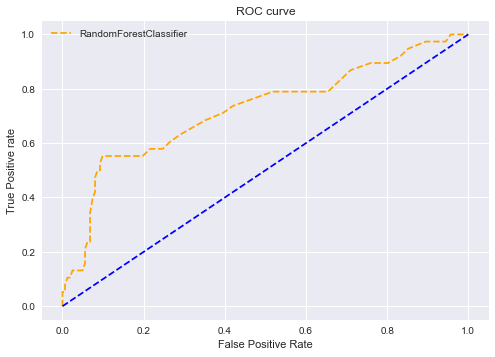

In [83]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 9.Saving The Model

In [84]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']